In [53]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from numpy import linalg
from sklearn.utils import shuffle
from scipy.io import arff
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
#from sklearn.cross_validation import train_test_split

In [54]:
def gaussianKernal(X1, X2, h):
    row1, col1 = np.shape(X1)
    row2, col2 = np.shape(X2)

    N = col2
    D = row2
    K = np.zeros((col1, col2))
    
    for i in range(0, col1):
        for j in range(0, col2):
            K[i][j] = (1/N)*(1/ np.power(np.sqrt(2*np.pi)*h, D) ) * np.exp(-0.5*(np.transpose(X1[:,i]-X2[:,j])*(X1[:,i]-X2[:,j]))/np.power(h,2))
    return K

In [55]:
#load the iris data into a pandas dataframe
iris_data = arff.loadarff('iris.arff')
iris_df = pd.DataFrame(iris_data[0])
del iris_df['class']
iris_data_with_class = pd.DataFrame(iris_df)
class_list = ([1] * 50) + ([2] * 50) + ([3] * 50)
iris_data_with_class.insert(4, "class", class_list, True)

#feature selection, find the top feature
array = iris_data_with_class.values
X = array[:, 0:4]
Y = array[:,4]

# Feature extraction
test = SelectKBest(score_func=chi2, k=1)
fit = test.fit(X, Y)

#reduce X to the selected feature
X = test.transform(X)
X = np.asmatrix(X)

In [62]:

h = 0.1

ax = np.arange(start=0, stop=8.01, step=0.05)
ax = np.asmatrix(ax)

p1 = np.zeros(len(ax))
p1 = np.asmatrix(p1)

for i in range(0,50):
    p1 = np.add(p1, gaussianKernal(np.asmatrix(X[i]), ax, h))
    
p2 = np.zeros(len(ax))
p2 = np.asmatrix(p1)

for i in range(50,100):
    p2 = np.add(p2, gaussianKernal(np.asmatrix(X[i]), ax, h))
    
p3 = np.zeros(len(ax))
p3 = np.asmatrix(p1)

for i in range(100,150):
    p3 = np.add(p3, gaussianKernal(np.asmatrix(X[i]), ax, h))

In [63]:
p1_df = pd.DataFrame(p1).T
p1_df.columns = ['p1vals']

p2_df = pd.DataFrame(p2).T
p2_df.columns = ['p2vals']

p3_df = pd.DataFrame(p3).T
p3_df.columns = ['p3vals']

ax_df = pd.DataFrame(ax).T
ax_df.columns = ['axvals']

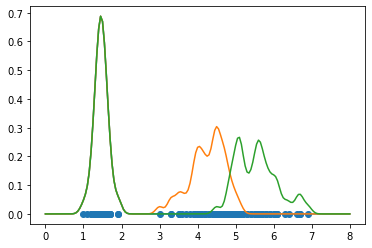

In [64]:
plt.plot(ax_df['axvals'], p1_df['p1vals'])
plt.plot(ax_df['axvals'], p2_df['p2vals'])
plt.plot(ax_df['axvals'], p3_df['p3vals'])
plt.scatter( pd.DataFrame(X).T, np.zeros(150))